In [1]:
import tensorflow as tf

2023-12-24 09:12:15.475351: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
tf.__version__

'2.9.1'

In [3]:
from tensorflow import keras

In [9]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from tensorflow.keras.preprocessing.image import load_img

In [6]:
img = load_img("./mushroom-data-small/Agaricus/000_ePQknW8cTp8.jpg", target_size=(299,299))

In [7]:
print(img)

<PIL.Image.Image image mode=RGB size=299x299 at 0x7F102DC427F0>


In [8]:
x = np.array(img)
x.shape

(299, 299, 3)

### Creating a dataset with path and mushroom class

In [10]:
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
import glob
image_list = []
i=0
for filepath in glob.glob('mushroom-data-small/*/*.jpg', recursive=True):
    mushroom_class = filepath.split("/")[1]
    image_list.append((filepath, mushroom_class))
    
data = pd.DataFrame(image_list, columns = ['filepath', 'name'])
print('data shape: {}'.format(data.shape))

data shape: (6714, 2)


In [11]:
mushroom_classes = data['name'].unique()
mushroom_classes

array(['Boletus', 'Amanita', 'Suillus', 'Agaricus', 'Entoloma',
       'Hygrocybe', 'Lactarius', 'Russula', 'Cortinarius'], dtype=object)

In [12]:
data.head()

,filepath,name
0,mushroom-data-small/Boletus/0921_nM5VBBjgKc0.jpg,Boletus
1,mushroom-data-small/Boletus/0666_9eWtHr3ssoA.jpg,Boletus
2,mushroom-data-small/Boletus/0253_g1jTDCR3Zu4.jpg,Boletus
3,mushroom-data-small/Boletus/0847_-UvAMD9bXpI.jpg,Boletus
4,mushroom-data-small/Boletus/0424_uauxZ0OBcgI.jpg,Boletus


In [13]:
data['name'].unique()

array(['Boletus', 'Amanita', 'Suillus', 'Agaricus', 'Entoloma',
       'Hygrocybe', 'Lactarius', 'Russula', 'Cortinarius'], dtype=object)

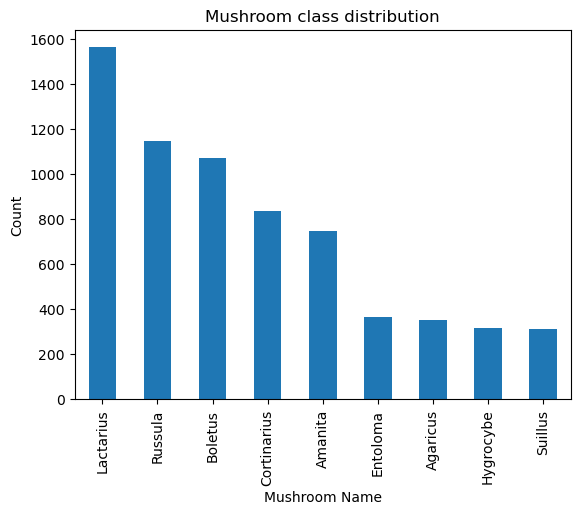

In [14]:
data['name'].value_counts().plot(kind='bar')
plt.title('Mushroom class distribution')
plt.xlabel('Mushroom Name')
plt.ylabel('Count')
plt.show()

In [15]:
!pip install 'scikit-learn'

  Using cached scikit_learn-1.3.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.9 MB)
  Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
  Using cached threadpoolctl-3.2.0-py3-none-any.whl (15 kB)


## Setting up Validation framework

In [16]:
from sklearn.model_selection import train_test_split
full_train_data = pd.DataFrame(columns = ['filepath', 'name'])
test_data = pd.DataFrame(columns = ['filepath', 'name'])
for mushroom in mushroom_classes:
    temp = data[data['name'] == mushroom].copy()
    train, test = train_test_split(temp, test_size=0.1)
    
    train_ls = train[['name', 'filepath']]
    test_ls = test[['name', 'filepath']]
    
    full_train_data = pd.concat([full_train_data, train_ls], ignore_index=True, sort=False)
    test_data = pd.concat([test_data, test_ls], ignore_index=True, sort=False)


In [17]:
len(full_train_data), len(test_data)

(6038, 676)

In [18]:
train_data = pd.DataFrame(columns = ['filepath', 'name'])
val_data = pd.DataFrame(columns = ['filepath', 'name'])
for mushroom in mushroom_classes:
    temp = full_train_data[full_train_data['name'] == mushroom].copy()
    train, test = train_test_split(temp, test_size=0.09)
    
    train_ls = train[['name', 'filepath']]
    test_ls = test[['name', 'filepath']]
    
    train_data = pd.concat([train_data, train_ls], ignore_index=True, sort=False)
    val_data = pd.concat([val_data, test_ls], ignore_index=True, sort=False)


In [19]:
len(train_data), len(val_data), len(test_data)

(5491, 547, 676)

In [20]:
train_data

,filepath,name
0,mushroom-data-small/Boletus/0392_neQZvBCY-i8.jpg,Boletus
1,mushroom-data-small/Boletus/1087_POSIDmOc7AE.jpg,Boletus
2,mushroom-data-small/Boletus/0183_bPr8OpQxM0k.jpg,Boletus
3,mushroom-data-small/Boletus/0422_s4HhKpuGXTY.jpg,Boletus
4,mushroom-data-small/Boletus/0365_w3QgqqeP-C8.jpg,Boletus
...,...,...
5486,mushroom-data-small/Cortinarius/252_fghhX0un7F...,Cortinarius
5487,mushroom-data-small/Cortinarius/185_OXwIsNfGrw...,Cortinarius
5488,mushroom-data-small/Cortinarius/266_y3AyAuEFap...,Cortinarius
5489,mushroom-data-small/Cortinarius/438_s5oRm6enpF...,Cortinarius


In [21]:
val_data

,filepath,name
0,mushroom-data-small/Boletus/1016_u0qQKb1D7C0.jpg,Boletus
1,mushroom-data-small/Boletus/0875_EeU4fbxaPYY.jpg,Boletus
2,mushroom-data-small/Boletus/1015_oyvO5yE3p4U.jpg,Boletus
3,mushroom-data-small/Boletus/0701_lZmhHH5fltU.jpg,Boletus
4,mushroom-data-small/Boletus/0846_gyjZQooFWuQ.jpg,Boletus
...,...,...
542,mushroom-data-small/Cortinarius/343_YY4qxL--3l...,Cortinarius
543,mushroom-data-small/Cortinarius/087_J9naibx1rF...,Cortinarius
544,mushroom-data-small/Cortinarius/119_Z_DKJnZen8...,Cortinarius
545,mushroom-data-small/Cortinarius/394_Es2KqO7AlG...,Cortinarius


In [22]:
test_data

,filepath,name
0,mushroom-data-small/Boletus/0637_b8GD9IP4FxY.jpg,Boletus
1,mushroom-data-small/Boletus/0057_xWBkl85FiAk.jpg,Boletus
2,mushroom-data-small/Boletus/0836_FkYdaUI06h0.jpg,Boletus
3,mushroom-data-small/Boletus/0684_vMnFJrCY0pg.jpg,Boletus
4,mushroom-data-small/Boletus/0029_62qyp3n74q0.jpg,Boletus
...,...,...
671,mushroom-data-small/Cortinarius/162_vx8DyMaDNb...,Cortinarius
672,mushroom-data-small/Cortinarius/071_S2h94kslTm...,Cortinarius
673,mushroom-data-small/Cortinarius/303_r7ia1LgtUV...,Cortinarius
674,mushroom-data-small/Cortinarius/033_x4ESW_Nu-A...,Cortinarius


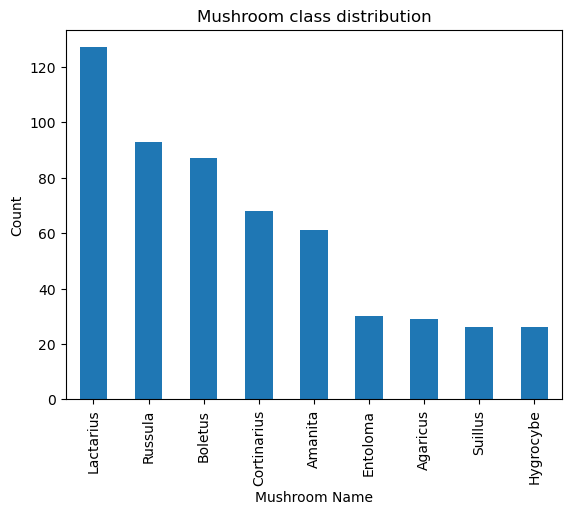

In [23]:
val_data['name'].value_counts().plot(kind='bar')
plt.title('Mushroom class distribution')
plt.xlabel('Mushroom Name')
plt.ylabel('Count')
plt.show()

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [24]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [25]:
# Load image and apply preprocess_input function
train_gen = ImageDataGenerator(preprocessing_function = preprocess_input)
val_gen = ImageDataGenerator(preprocessing_function = preprocess_input)

In [37]:
train_ds = train_gen.flow_from_dataframe(train_data,
    './',
    x_col='filepath',
    y_col='name',
    target_size=(150, 150),
    batch_size=32,
    shuffle=True)

val_ds = val_gen.flow_from_dataframe(val_data,
    './',
    x_col='filepath',
    y_col='name',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False)

Found 4023 validated image filenames belonging to 9 classes.
Found 1344 validated image filenames belonging to 9 classes.


In [23]:
train_ds.class_indices

{'Agaricus': 0,
 'Amanita': 1,
 'Boletus': 2,
 'Cortinarius': 3,
 'Entoloma': 4,
 'Hygrocybe': 5,
 'Lactarius': 6,
 'Russula': 7,
 'Suillus': 8}

In [24]:
val_ds.class_indices

{'Agaricus': 0,
 'Amanita': 1,
 'Boletus': 2,
 'Cortinarius': 3,
 'Entoloma': 4,
 'Hygrocybe': 5,
 'Lactarius': 6,
 'Russula': 7,
 'Suillus': 8}

In [25]:
# return 2 things, X and y, X is input with preprocess_infut function applied
X, y = next(train_ds)

In [26]:
X.shape

(32, 150, 150, 3)

In [27]:
base_model = Xception(
    weights='imagenet',
    include_top = False,
    input_shape=(150, 150, 3)
                     )

base_model.trainable = False # when we train our model, we don't want to change convolutional layers

2023-12-19 07:10:41.654589: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-19 07:10:41.660743: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-19 07:10:41.661561: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-19 07:10:41.662597: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

In [28]:
# Create new top

inputs = keras.Input(shape=(150, 150, 3))

# we use our base model to extract this vector representation
# Then we apply base model to inputs and it produces 3 dim
base = base_model(inputs, training=False)

# pooling = keras.layers.GlobalAveragePooling2D()
# vectors = pooling(base)
# vectors = keras.layers.GlobalAveragePooling2D()(base)


# 9 dense layers because we have 9 classes
outputs = base

model = keras.Model(inputs, outputs)

In [29]:
preds = model.predict(X)

2023-12-19 07:10:47.294987: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2023-12-19 07:10:47.926731: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-19 07:10:47.927237: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-19 07:10:47.927272: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2023-12-19 07:10:47.927851: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-19 07:10:47.927954: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


1/1 [==============================] - 3s 3s/step


In [30]:
preds.shape

(32, 5, 5, 2048)

In [31]:
## Lets add pooling

# Create new top

inputs = keras.Input(shape=(150, 150, 3))

# we use our base model to extract this vector representation
# Then we apply base model to inputs and it produces 3 dim
base = base_model(inputs, training=False)

pooling = keras.layers.GlobalAveragePooling2D()
vectors = pooling(base)

# 9 dense layers because we have 9 classes
outputs = keras.layers.Dense(9)(vectors)

model = keras.Model(inputs, outputs)

In [32]:
preds = model.predict(X)

1/1 [==============================] - 1s 617ms/step


In [33]:
preds.shape

(32, 9)

In [34]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 xception (Functional)       (None, 5, 5, 2048)        20861480  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 9)                 18441     
                                                                 
Total params: 20,879,921
Trainable params: 18,441
Non-trainable params: 20,861,480
_________________________________________________________________


In [35]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
loss = keras.losses.CategoricalCrossentropy(from_logits=True) # because multiclass classification

In [36]:
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [50]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds) # epochs, go over dataset once means 1 epoch

Epoch 1/10
126/126 [==============================] - 44s 347ms/step - loss: 0.6931 - accuracy: 0.7765 - val_loss: 2.5954 - val_accuracy: 0.5246
Epoch 2/10
126/126 [==============================] - 43s 344ms/step - loss: 0.6937 - accuracy: 0.7701 - val_loss: 2.1271 - val_accuracy: 0.5685
Epoch 3/10
126/126 [==============================] - 43s 342ms/step - loss: 0.5298 - accuracy: 0.8262 - val_loss: 2.1026 - val_accuracy: 0.5774
Epoch 4/10
126/126 [==============================] - 43s 343ms/step - loss: 0.3988 - accuracy: 0.8606 - val_loss: 2.1290 - val_accuracy: 0.5938
Epoch 5/10
126/126 [==============================] - 43s 344ms/step - loss: 0.3102 - accuracy: 0.8899 - val_loss: 1.9384 - val_accuracy: 0.5975
Epoch 6/10
126/126 [==============================] - 43s 343ms/step - loss: 0.2777 - accuracy: 0.8954 - val_loss: 2.1253 - val_accuracy: 0.5751
Epoch 7/10
126/126 [==============================] - 43s 345ms/step - loss: 0.2432 - accuracy: 0.9105 - val_loss: 2.0876 - val_ac

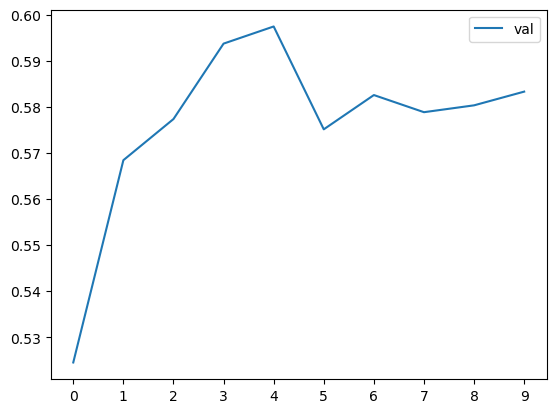

In [52]:
# plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')

plt.xticks(np.arange(10))

plt.legend()

In [53]:
# Lets see if we can get better performance by adjusting the learning rate

In [32]:
def create_model(learning_rate = 0.01):
    base_model = Xception(
    weights='imagenet',
    include_top = False,
    input_shape=(150, 150, 3)
        )

    base_model.trainable = False # when we train our model, we don't want to change convolutional layers

    ####################################
    
    # Create new top
    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    # 9 dense layers because we have 9 classes
    outputs = keras.layers.Dense(9)(vectors)
    model = keras.Model(inputs, outputs)
    
    ####################################

    optimizer = keras.optimizers.Adam(
        learning_rate=learning_rate
    )
    loss = keras.losses.CategoricalCrossentropy(from_logits=True) # because multiclass classification
    model.compile(optimizer=optimizer, 
                  loss=loss, 
                  metrics=['accuracy'])
    return model

In [34]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(f"Training model with learning_rate = {lr}")
    
    model = create_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds) # epochs, go over dataset once means 1 epoch
    scores[lr] = history.history
    
    print(f"Finished Training model with learning_rate = {lr}")
    print()
    

Training model with learning_rate = 0.0001
Epoch 1/10


2023-12-17 11:08:36.088378: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2023-12-17 11:08:36.696335: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-17 11:08:36.696868: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-17 11:08:36.696905: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2023-12-17 11:08:36.697524: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-17 11:08:36.697604: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


126/126 [==============================] - 52s 376ms/step - loss: 2.0320 - accuracy: 0.2754 - val_loss: 1.7842 - val_accuracy: 0.3884
Epoch 2/10
126/126 [==============================] - 41s 329ms/step - loss: 1.6835 - accuracy: 0.4089 - val_loss: 1.5805 - val_accuracy: 0.4546
Epoch 3/10
126/126 [==============================] - 41s 325ms/step - loss: 1.5089 - accuracy: 0.4802 - val_loss: 1.4672 - val_accuracy: 0.4926
Epoch 4/10
126/126 [==============================] - 41s 323ms/step - loss: 1.3998 - accuracy: 0.5215 - val_loss: 1.4011 - val_accuracy: 0.5164
Epoch 5/10
126/126 [==============================] - 41s 325ms/step - loss: 1.3246 - accuracy: 0.5456 - val_loss: 1.3529 - val_accuracy: 0.5216
Epoch 6/10
126/126 [==============================] - 42s 330ms/step - loss: 1.2668 - accuracy: 0.5685 - val_loss: 1.3221 - val_accuracy: 0.5320
Epoch 7/10
126/126 [==============================] - 41s 328ms/step - loss: 1.2220 - accuracy: 0.5799 - val_loss: 1.2935 - val_accuracy: 0.5

In [ ]:
# Overfitting
# Maybe add augmentation?

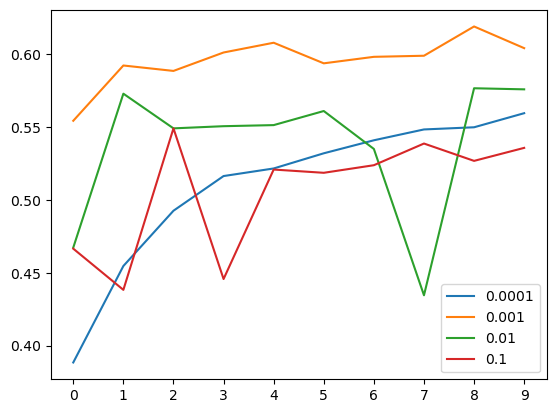

In [54]:
for lr, hist in scores.items():
    plt.plot(hist['val_accuracy'], label = lr)
#     plt.plot(hist['accuracy'], label = lr)
    
plt.xticks(np.arange(10))
plt.legend()

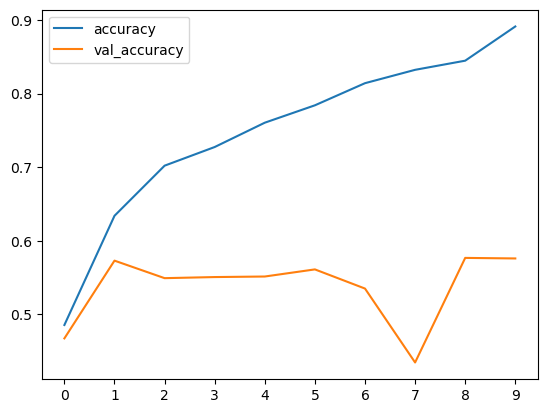

In [49]:
temp = scores[0.01]
plt.plot(temp['accuracy'], label = 'accuracy')
plt.plot(temp['val_accuracy'], label = 'val_accuracy')
plt.xticks(np.arange(10))
plt.legend()

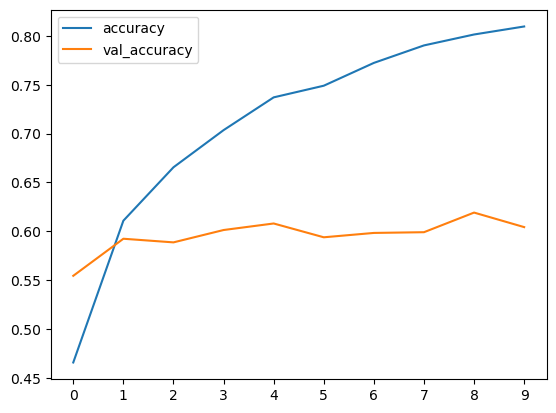

In [50]:
temp = scores[0.001]
plt.plot(temp['accuracy'], label = 'accuracy')
plt.plot(temp['val_accuracy'], label = 'val_accuracy')
plt.xticks(np.arange(10))
plt.legend()

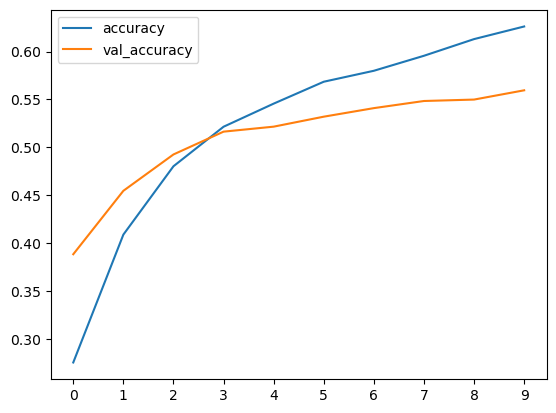

In [55]:
temp = scores[0.0001]
plt.plot(temp['accuracy'], label = 'accuracy')
plt.plot(temp['val_accuracy'], label = 'val_accuracy')
plt.xticks(np.arange(10))
plt.legend()

In [56]:
del scores[0.0001]
del scores[0.1]

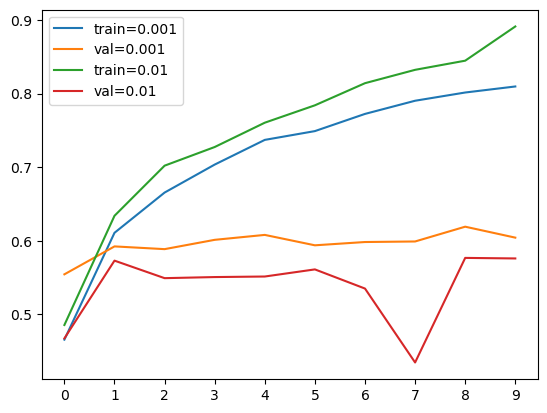

In [59]:
for lr, hist in scores.items():
    plt.plot(hist['accuracy'], label =('train=%s' %lr))
    plt.plot(hist['val_accuracy'], label =('val=%s' %lr))
    
plt.xticks(np.arange(10))
plt.legend()

In [60]:
learning_rate = 0.001

In [ ]:
# Adding 1 more inner layer

In [66]:
def create_model(learning_rate = 0.01, size_inner=100):
    base_model = Xception(
    weights='imagenet',
    include_top = False,
    input_shape=(150, 150, 3)
    )

    base_model.trainable = False
    
    ###########################################################
    
    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    
    outputs = keras.layers.Dense(9)(inner)
    model = keras.Model(inputs, outputs)
    
    ###########################################################
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True) # because multiclass classification
    
    model.compile(optimizer=optimizer, 
                  loss=loss, 
                  metrics=['accuracy'])
    
    return model

In [68]:
learning_rate = 0.001

scores = {}

for size in [10, 100, 1000]:
    print(f"Training model with inner_layer of size = {size}")
    
    model = create_model(learning_rate = learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history
    
    print(f"Finished Training model with inner_layer of size = {size}")
    print()


Training model with inner_layer of size = 10
Epoch 1/10
126/126 [==============================] - 43s 329ms/step - loss: 1.8760 - accuracy: 0.3388 - val_loss: 1.7112 - val_accuracy: 0.3884
Epoch 2/10
126/126 [==============================] - 41s 322ms/step - loss: 1.5800 - accuracy: 0.4452 - val_loss: 1.5476 - val_accuracy: 0.4487
Epoch 3/10
126/126 [==============================] - 41s 323ms/step - loss: 1.4005 - accuracy: 0.5011 - val_loss: 1.4892 - val_accuracy: 0.4643
Epoch 4/10
126/126 [==============================] - 41s 322ms/step - loss: 1.2789 - accuracy: 0.5521 - val_loss: 1.4385 - val_accuracy: 0.5067
Epoch 5/10
126/126 [==============================] - 41s 322ms/step - loss: 1.1981 - accuracy: 0.5961 - val_loss: 1.4227 - val_accuracy: 0.5216
Epoch 6/10
126/126 [==============================] - 41s 322ms/step - loss: 1.1262 - accuracy: 0.6130 - val_loss: 1.4101 - val_accuracy: 0.5253
Epoch 7/10
126/126 [==============================] - 41s 322ms/step - loss: 1.0640 -

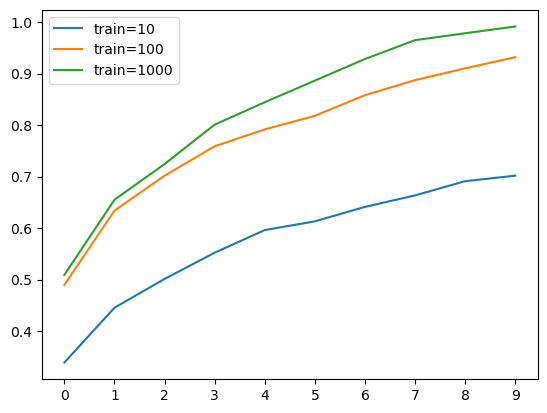

In [71]:
for size, hist in scores.items():
    plt.plot(hist['accuracy'], label = ('train=%s' % size))
#     plt.plot(hist['val_accuracy'], label = ('val=%s' % size))
    
plt.xticks(np.arange(10))
plt.legend()

In [72]:
del scores[10]

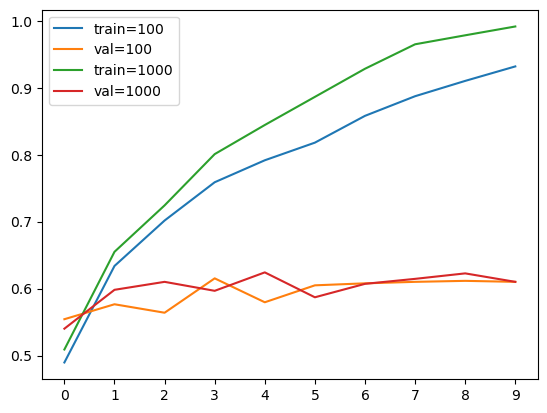

In [73]:
for size, hist in scores.items():
    plt.plot(hist['accuracy'], label = ('train=%s' % size))
    plt.plot(hist['val_accuracy'], label = ('val=%s' % size))
    
plt.xticks(np.arange(10))
plt.legend()

## Regularization and Dropout

In [38]:
def create_model(learning_rate = 0.01, size_inner=100, droprate=0.5):
    base_model = Xception(
    weights='imagenet',
    include_top = False,
    input_shape=(150, 150, 3)
    )

    base_model.trainable = False
    
    ###########################################################
    
    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    # drop rate comes after dense layers and rate represents how much network we freeze
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(9)(drop)
    model = keras.Model(inputs, outputs)
    
    ###########################################################
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True) # because multiclass classification
    
    model.compile(optimizer=optimizer, 
                  loss=loss, 
                  metrics=['accuracy'])
    
    return model

In [28]:
learning_rate = 0.001
size_inner = 100

scores = {}

for droprate in [0.0, 0.2, 0.5, 0.8]:
    print(droprate)
    
    model = create_model(
        learning_rate = learning_rate, 
        size_inner = size_inner,
        droprate = droprate
    )
    
    # Now that we have added droprate Neural Network will need more iterations than 10
    # So we need to increase epochs
    history = model.fit(train_ds, epochs = 30, validation_data = val_ds)
    scores[droprate] = history.history
    
    print()
    print()

0.0


2023-12-19 08:52:17.557205: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-19 08:52:17.563678: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-19 08:52:17.564289: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-19 08:52:17.565284: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

Epoch 1/30


2023-12-19 08:52:23.501305: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2023-12-19 08:52:24.128763: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-19 08:52:24.129301: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-19 08:52:24.129338: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2023-12-19 08:52:24.130143: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-19 08:52:24.130232: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


126/126 [==============================] - 54s 394ms/step - loss: 1.4297 - accuracy: 0.5034 - val_loss: 1.2317 - val_accuracy: 0.5744
Epoch 2/30
126/126 [==============================] - 44s 346ms/step - loss: 1.0248 - accuracy: 0.6448 - val_loss: 1.1653 - val_accuracy: 0.6116
Epoch 3/30
126/126 [==============================] - 44s 346ms/step - loss: 0.8604 - accuracy: 0.7117 - val_loss: 1.1219 - val_accuracy: 0.6079
Epoch 4/30
126/126 [==============================] - 43s 345ms/step - loss: 0.7177 - accuracy: 0.7559 - val_loss: 1.1391 - val_accuracy: 0.6019
Epoch 5/30
126/126 [==============================] - 43s 344ms/step - loss: 0.6114 - accuracy: 0.7939 - val_loss: 1.2341 - val_accuracy: 0.6079
Epoch 6/30
126/126 [==============================] - 43s 345ms/step - loss: 0.5228 - accuracy: 0.8265 - val_loss: 1.2417 - val_accuracy: 0.6124
Epoch 7/30
126/126 [==============================] - 43s 345ms/step - loss: 0.4351 - accuracy: 0.8591 - val_loss: 1.1957 - val_accuracy: 0.6

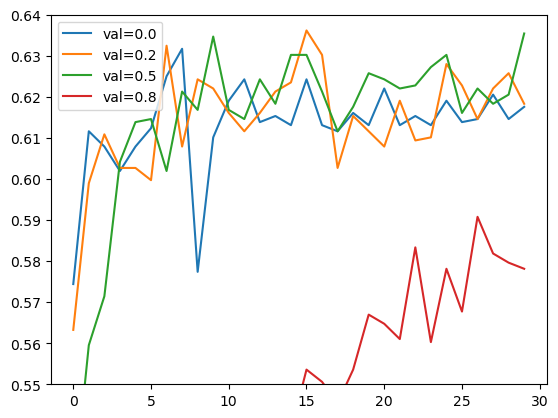

In [48]:
for droprate, hist in scores.items():
#     plt.plot(hist['accuracy'], label = ('train=%s' % droprate))
    plt.plot(hist['val_accuracy'], label = ('val=%s' % droprate))
    
plt.ylim(0.55, 0.64)
plt.legend()

In [49]:
droprate = 0.2

## Regularization using Data Augmentation

In [59]:
# Load image and apply preprocess_input function

# Load image and apply preprocess_input function
train_gen = ImageDataGenerator(
    preprocessing_function = preprocess_input,
    shear_range=10,
    zoom_range=0.1,
    vertical_flip=True)


train_ds = train_gen.flow_from_dataframe(train_data,
    './',
    x_col='filepath',
    y_col='name',
    target_size=(150, 150),
    batch_size=32)

# Loading Validation data same as above

# Load image and apply preprocess_input function
val_gen = ImageDataGenerator(preprocessing_function = preprocess_input)

val_ds = val_gen.flow_from_dataframe(val_data,
    './',
    x_col='filepath',
    y_col='name',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False) # WE don't need to shuffle since its just for validating

Found 4023 validated image filenames belonging to 9 classes.
Found 1344 validated image filenames belonging to 9 classes.


In [55]:
learning_rate = 0.001
size_inner = 100
droprate = 0.2

scores = {}

    
model = create_model(
    learning_rate = learning_rate, 
    size_inner = size_inner,
    droprate = droprate
)
    
history = model.fit(train_ds, epochs = 50, validation_data = val_ds)


Epoch 1/50
126/126 [==============================] - 62s 478ms/step - loss: 1.6627 - accuracy: 0.4084 - val_loss: 1.3459 - val_accuracy: 0.5320
Epoch 2/50
126/126 [==============================] - 59s 471ms/step - loss: 1.3541 - accuracy: 0.5227 - val_loss: 1.2790 - val_accuracy: 0.5528
Epoch 3/50
126/126 [==============================] - 59s 470ms/step - loss: 1.2338 - accuracy: 0.5655 - val_loss: 1.1968 - val_accuracy: 0.5900
Epoch 4/50
126/126 [==============================] - 59s 471ms/step - loss: 1.1762 - accuracy: 0.5874 - val_loss: 1.1810 - val_accuracy: 0.5893
Epoch 5/50
126/126 [==============================] - 59s 471ms/step - loss: 1.1443 - accuracy: 0.5986 - val_loss: 1.1791 - val_accuracy: 0.5975
Epoch 6/50
126/126 [==============================] - 60s 472ms/step - loss: 1.0847 - accuracy: 0.6155 - val_loss: 1.1625 - val_accuracy: 0.6049
Epoch 7/50
126/126 [==============================] - 59s 468ms/step - loss: 1.0742 - accuracy: 0.6257 - val_loss: 1.1320 - val_ac

In [56]:
dict(zip(history.history['accuracy'], history.history['val_accuracy']))

{0.4084016978740692: 0.5319940447807312,
 0.5227442383766174: 0.5528273582458496,
 0.565498411655426: 0.590029776096344,
 0.5873726010322571: 0.5892857313156128,
 0.5985583066940308: 0.597470223903656,
 0.6154611110687256: 0.6049107313156128,
 0.6256524920463562: 0.6160714030265808,
 0.631121039390564: 0.6123511791229248,
 0.6405667662620544: 0.6190476417541504,
 0.6589609980583191: 0.601934552192688,
 0.6674124002456665: 0.6086309552192688,
 0.6614466905593872: 0.5997023582458496,
 0.6726323366165161: 0.6190476417541504,
 0.6907780170440674: 0.6138392686843872,
 0.6957494616508484: 0.6264880895614624,
 0.6922694444656372: 0.6205357313156128,
 0.7014665603637695: 0.6086309552192688,
 0.7004722952842712: 0.6197916865348816,
 0.7208550572395325: 0.6242559552192688,
 0.7136465311050415: 0.6197916865348816,
 0.7230921983718872: 0.601190447807312,
 0.7315436005592346: 0.6294642686843872,
 0.7464578747749329: 0.616815447807312,
 0.736763596534729: 0.613095223903656,
 0.7377579212188721: 0.61

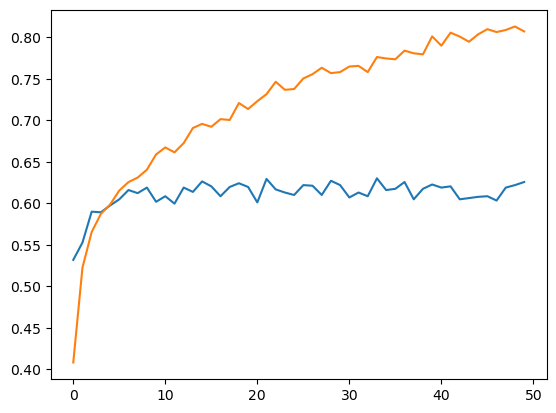

In [57]:
hist = history.history
plt.plot(hist['val_accuracy'], label = 'val')
plt.plot(hist['accuracy'], label = 'train')

## Trying ResNet

In [46]:
from tensorflow.keras.applications.resnet_v2 import ResNet50V2
# from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.resnet_v2 import decode_predictions

from tensorflow.keras.applications.resnet_v2 import preprocess_input

In [47]:
def create_model(learning_rate = 0.01, size_inner=100, droprate=0.5):
    base_model = ResNet50V2(
    weights='imagenet',
    include_top = False,
    input_shape=(150, 150, 3)
    )

    base_model.trainable = False
    
    ###########################################################
    
    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
#     inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    # drop rate comes after dense layers and rate represents how much network we freeze
#     drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(9)(vectors)
    model = keras.Model(inputs, outputs)
    
    ###########################################################
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True) # because multiclass classification
    
    model.compile(optimizer=optimizer, 
                  loss=loss, 
                  metrics=['accuracy'])
    
    return model

In [48]:
learning_rate = 0.01
size_inner = 100
droprate = 0.2

scores = {}

    
model = create_model(
    learning_rate = learning_rate, 
    size_inner = size_inner,
    droprate = droprate
)
    
history = model.fit(train_ds, epochs = 10, validation_data = val_ds)


94668760/94668760 [==============================] - 2s 0us/step
Epoch 1/10
126/126 [==============================] - 63s 478ms/step - loss: 2.9698 - accuracy: 0.4303 - val_loss: 2.3384 - val_accuracy: 0.5208
Epoch 2/10
126/126 [==============================] - 59s 470ms/step - loss: 2.7222 - accuracy: 0.5116 - val_loss: 2.8065 - val_accuracy: 0.5275
Epoch 3/10
126/126 [==============================] - 59s 469ms/step - loss: 2.4637 - accuracy: 0.5573 - val_loss: 3.4979 - val_accuracy: 0.4829
Epoch 4/10
126/126 [==============================] - 59s 470ms/step - loss: 2.3709 - accuracy: 0.5727 - val_loss: 2.9234 - val_accuracy: 0.5417
Epoch 5/10
126/126 [==============================] - 59s 471ms/step - loss: 2.4254 - accuracy: 0.5846 - val_loss: 3.0748 - val_accuracy: 0.5610
Epoch 6/10
126/126 [==============================] - 59s 470ms/step - loss: 2.3528 - accuracy: 0.6020 - val_loss: 3.8762 - val_accuracy: 0.5015
Epoch 7/10
126/126 [==============================] - 59s 470ms/s

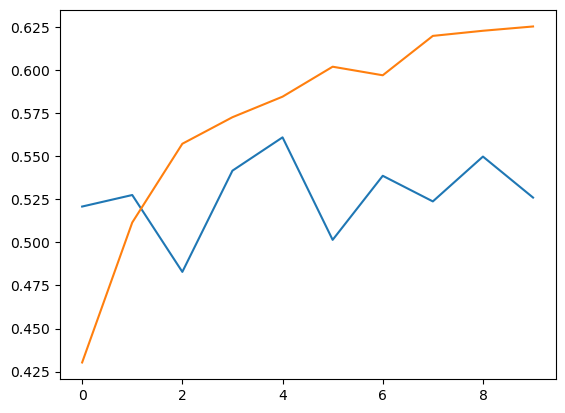

In [49]:
hist = history.history
plt.plot(hist['val_accuracy'], label = 'val')
plt.plot(hist['accuracy'], label = 'train')

In [56]:
def create_model(learning_rate = 0.01, size_inner=1000, size_inner_one=100, droprate=0.5):
    base_model = ResNet50V2(
    weights='imagenet',
    include_top = False,
    input_shape=(150, 150, 3)
    )

    base_model.trainable = False
    
    ###########################################################
    
    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    inner_one = keras.layers.Dense(size_inner_one, activation='relu')(inner)
    # drop rate comes after dense layers and rate represents how much network we freeze
#     drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(9)(inner_one)
    model = keras.Model(inputs, outputs)
    
    ###########################################################
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True) # because multiclass classification
    
    model.compile(optimizer=optimizer, 
                  loss=loss, 
                  metrics=['accuracy'])
    
    return model

In [57]:
learning_rate = 0.01
size_inner = 1000
size_inner_one=100
droprate = 0.2

scores = {}

    
model = create_model(
    learning_rate = learning_rate, 
    size_inner = size_inner,
    size_inner_one = size_inner_one,
    droprate = droprate
)
    
history = model.fit(train_ds, epochs = 10, validation_data = val_ds)


Epoch 1/10
126/126 [==============================] - 63s 478ms/step - loss: 3.2427 - accuracy: 0.2908 - val_loss: 1.9464 - val_accuracy: 0.3259
Epoch 2/10
126/126 [==============================] - 59s 472ms/step - loss: 1.7637 - accuracy: 0.3704 - val_loss: 1.7299 - val_accuracy: 0.4070
Epoch 3/10
126/126 [==============================] - 59s 469ms/step - loss: 1.6545 - accuracy: 0.4226 - val_loss: 1.6260 - val_accuracy: 0.4390
Epoch 4/10
126/126 [==============================] - 59s 470ms/step - loss: 1.6209 - accuracy: 0.4392 - val_loss: 1.5817 - val_accuracy: 0.4442
Epoch 5/10
126/126 [==============================] - 59s 470ms/step - loss: 1.6072 - accuracy: 0.4457 - val_loss: 1.5223 - val_accuracy: 0.4829
Epoch 6/10
126/126 [==============================] - 59s 471ms/step - loss: 1.5571 - accuracy: 0.4613 - val_loss: 1.6587 - val_accuracy: 0.3929
Epoch 7/10
126/126 [==============================] - 59s 471ms/step - loss: 1.5036 - accuracy: 0.4740 - val_loss: 1.4823 - val_ac

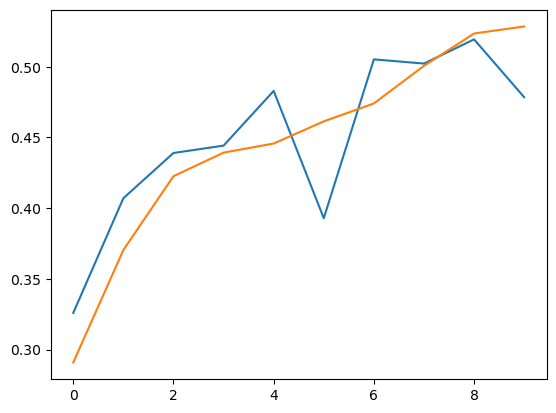

In [58]:
hist = history.history
plt.plot(hist['val_accuracy'], label = 'val')
plt.plot(hist['accuracy'], label = 'train')

In [60]:
# Lets add regularization

In [61]:
learning_rate = 0.01
size_inner = 1000
size_inner_one=100
droprate = 0.2

scores = {}

    
model = create_model(
    learning_rate = learning_rate, 
    size_inner = size_inner,
    size_inner_one = size_inner_one,
    droprate = droprate
)
    
history = model.fit(train_ds, epochs = 10, validation_data = val_ds)


Epoch 1/10
126/126 [==============================] - 63s 478ms/step - loss: 3.6482 - accuracy: 0.3681 - val_loss: 1.4632 - val_accuracy: 0.5134
Epoch 2/10
126/126 [==============================] - 59s 471ms/step - loss: 1.4676 - accuracy: 0.4961 - val_loss: 1.3954 - val_accuracy: 0.5119
Epoch 3/10
126/126 [==============================] - 59s 469ms/step - loss: 1.3473 - accuracy: 0.5344 - val_loss: 1.4799 - val_accuracy: 0.5119
Epoch 4/10
126/126 [==============================] - 59s 471ms/step - loss: 1.2795 - accuracy: 0.5553 - val_loss: 1.2758 - val_accuracy: 0.5692
Epoch 5/10
126/126 [==============================] - 59s 471ms/step - loss: 1.2427 - accuracy: 0.5769 - val_loss: 1.2837 - val_accuracy: 0.5677
Epoch 6/10
126/126 [==============================] - 59s 469ms/step - loss: 1.1616 - accuracy: 0.6003 - val_loss: 1.2350 - val_accuracy: 0.5766
Epoch 7/10
126/126 [==============================] - 59s 471ms/step - loss: 1.1584 - accuracy: 0.5946 - val_loss: 1.2988 - val_ac

In [ ]:
scores = {}

size_inner = 1000
size_inner_one=100
droprate = 0.2

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(f"Training model with learning_rate = {lr}")
    
    model = create_model(learning_rate=lr, 
                         size_inner=size_inner, 
                         size_inner_one=size_inner_one,
                        droprate = droprate)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds) # epochs, go over dataset once means 1 epoch
    scores[lr] = history.history
    
    print(f"Finished Training model with learning_rate = {lr}")
    print()
    

Training model with learning_rate = 0.0001
Epoch 1/10
126/126 [==============================] - 63s 478ms/step - loss: 1.6703 - accuracy: 0.4114 - val_loss: 1.3923 - val_accuracy: 0.5119
Epoch 2/10
126/126 [==============================] - 59s 471ms/step - loss: 1.2621 - accuracy: 0.5585 - val_loss: 1.2982 - val_accuracy: 0.5595
Epoch 3/10
126/126 [==============================] - 59s 469ms/step - loss: 1.1152 - accuracy: 0.6145 - val_loss: 1.1985 - val_accuracy: 0.5856
Epoch 4/10
126/126 [==============================] - 59s 470ms/step - loss: 1.0223 - accuracy: 0.6473 - val_loss: 1.1758 - val_accuracy: 0.5915
Epoch 5/10
126/126 [==============================] - 59s 470ms/step - loss: 0.9597 - accuracy: 0.6672 - val_loss: 1.1440 - val_accuracy: 0.6071
Epoch 6/10
126/126 [==============================] - 59s 469ms/step - loss: 0.8970 - accuracy: 0.6965 - val_loss: 1.1515 - val_accuracy: 0.5997
Epoch 7/10
126/126 [==============================] - 59s 470ms/step - loss: 0.8221 - a

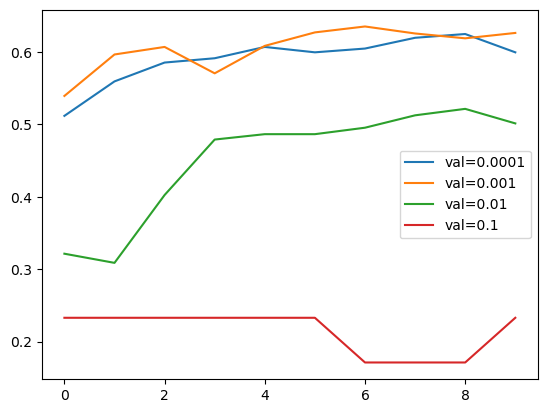

In [65]:
for lr, hist in scores.items():
#     plt.plot(hist['accuracy'], label = ('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label = ('val=%s' % lr))
    
# plt.ylim(0.55, 0.64)
plt.legend()

In [66]:
#lets make trainijng set bigger

In [80]:
# Load image and apply preprocess_input function

# Load image and apply preprocess_input function
train_gen = ImageDataGenerator(
    preprocessing_function = preprocess_input,
    shear_range=10,
    zoom_range=0.1,
    vertical_flip=True)


train_ds = train_gen.flow_from_dataframe(train_data,
    './',
    x_col='filepath',
    y_col='name',
    target_size=(150, 150),
    batch_size=32)

# Loading Validation data same as above

# Load image and apply preprocess_input function
val_gen = ImageDataGenerator(preprocessing_function = preprocess_input)

val_ds = val_gen.flow_from_dataframe(val_data,
    './',
    x_col='filepath',
    y_col='name',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False) # WE don't need to shuffle since its just for validating

Found 5491 validated image filenames belonging to 9 classes.
Found 547 validated image filenames belonging to 9 classes.


In [ ]:
def create_model(learning_rate = 0.01, size_inner=1000, size_inner_one=100, droprate=0.5):
    base_model = ResNet50V2(
    weights='imagenet',
    include_top = False,
    input_shape=(150, 150, 3)
    )

    base_model.trainable = False
    
    ###########################################################
    
    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    inner_one = keras.layers.Dense(size_inner_one, activation='relu')(inner)
    # drop rate comes after dense layers and rate represents how much network we freeze
#     drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(9)(inner_one)
    model = keras.Model(inputs, outputs)
    
    ###########################################################
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True) # because multiclass classification
    
    model.compile(optimizer=optimizer, 
                  loss=loss, 
                  metrics=['accuracy'])
    
    return model

In [81]:
learning_rate = 0.001
size_inner = 1000
# size_inner_one=100
droprate = 0.2

scores = {}

for size_inner_one in [10000, 1000, 100]:
    print(f"Training model with second inner layer with size = {size_inner_one}")
    
    model = create_model(learning_rate = learning_rate, 
                         size_inner = size_inner, 
                         size_inner_one = size_inner_one,
                        droprate = droprate)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds) # epochs, go over dataset once means 1 epoch
    scores[lr] = history.history
    
    print(f"Finished Training model with second inner layer with size = {size_inner_one}")
    print()

Training model with second inner layer with size = 10000
Epoch 1/10
172/172 [==============================] - 77s 427ms/step - loss: 1.7505 - accuracy: 0.4411 - val_loss: 1.2633 - val_accuracy: 0.5722
Epoch 2/10
172/172 [==============================] - 70s 408ms/step - loss: 1.2610 - accuracy: 0.5558 - val_loss: 1.2374 - val_accuracy: 0.5704
Epoch 3/10
172/172 [==============================] - 70s 408ms/step - loss: 1.1676 - accuracy: 0.5917 - val_loss: 1.2827 - val_accuracy: 0.5850
Epoch 4/10
172/172 [==============================] - 70s 410ms/step - loss: 1.1133 - accuracy: 0.6064 - val_loss: 1.1405 - val_accuracy: 0.6380
Epoch 5/10
172/172 [==============================] - 70s 409ms/step - loss: 1.0267 - accuracy: 0.6332 - val_loss: 1.1503 - val_accuracy: 0.6252
Epoch 6/10
172/172 [==============================] - 70s 409ms/step - loss: 0.9718 - accuracy: 0.6633 - val_loss: 1.1906 - val_accuracy: 0.6161
Epoch 7/10
172/172 [==============================] - 71s 410ms/step - lo

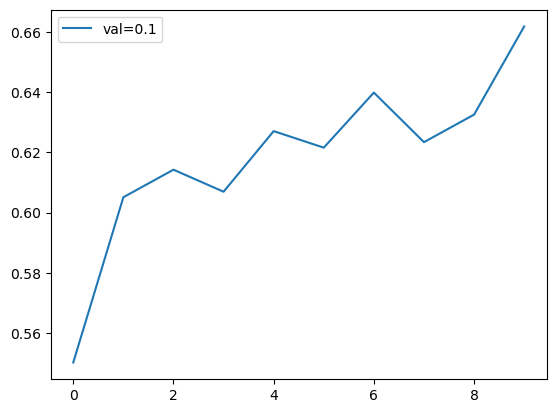

In [83]:
for size_inner_one, hist in scores.items():
#     plt.plot(hist['accuracy'], label = ('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label = ('val=%s' % size_inner_one))
    
# plt.ylim(0.55, 0.64)
plt.legend()

In [85]:
def create_model(learning_rate = 0.01, 
                 size_inner=1000, 
                 size_inner_one=100, 
                 size_inner_two=100, 
                 droprate=0.5):
    
    base_model = ResNet50V2(
    weights='imagenet',
    include_top = False,
    input_shape=(150, 150, 3)
    )

    base_model.trainable = False
    
    ###########################################################
    
    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    inner_one = keras.layers.Dense(size_inner_one, activation='relu')(inner)
    inner_two = keras.layers.Dense(size_inner_two, activation='relu')(inner_one)
    # drop rate comes after dense layers and rate represents how much network we freeze
    # drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(9)(inner_two)
    model = keras.Model(inputs, outputs)
    
    ###########################################################
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True) # because multiclass classification
    
    model.compile(optimizer=optimizer, 
                  loss=loss, 
                  metrics=['accuracy'])
    
    return model

In [86]:
learning_rate = 0.001
size_inner = 1000
size_inner_one=100
droprate = 0.2

scores = {}

for size_inner_two in [1000, 100, 10]:
    print(f"Training model with second inner layer with size = {size_inner_two}")
    
    model = create_model(learning_rate = learning_rate, 
                         size_inner = size_inner, 
                         size_inner_one = size_inner_one,
                         size_inner_two = size_inner_two,
                        droprate = droprate)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds) # epochs, go over dataset once means 1 epoch
    scores[size_inner_two] = history.history
    
    print(f"Finished Training model with second inner layer with size = {size_inner_two}")
    print()

Training model with second inner layer with size = 100
Epoch 1/10
172/172 [==============================] - 74s 418ms/step - loss: 1.5327 - accuracy: 0.4660 - val_loss: 1.2609 - val_accuracy: 0.5777
Epoch 2/10
172/172 [==============================] - 71s 413ms/step - loss: 1.2412 - accuracy: 0.5680 - val_loss: 1.2366 - val_accuracy: 0.5722
Epoch 3/10
172/172 [==============================] - 71s 410ms/step - loss: 1.1162 - accuracy: 0.6075 - val_loss: 1.1260 - val_accuracy: 0.6143
Epoch 4/10
172/172 [==============================] - 70s 410ms/step - loss: 1.0247 - accuracy: 0.6372 - val_loss: 1.0849 - val_accuracy: 0.6234
Epoch 5/10
172/172 [==============================] - 70s 409ms/step - loss: 0.9614 - accuracy: 0.6587 - val_loss: 1.0869 - val_accuracy: 0.6307
Epoch 6/10
172/172 [==============================] - 71s 410ms/step - loss: 0.8895 - accuracy: 0.6815 - val_loss: 1.1497 - val_accuracy: 0.6417
Epoch 7/10
172/172 [==============================] - 70s 408ms/step - loss

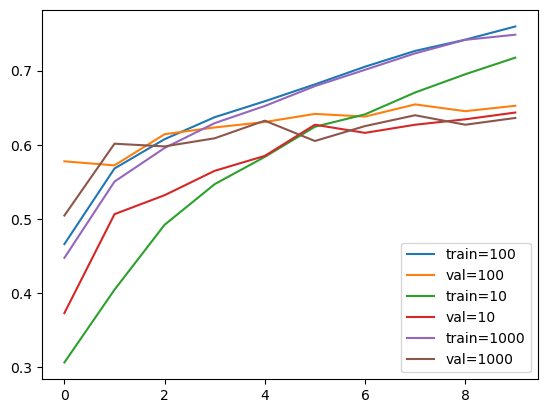

In [94]:
for size_inner_two, hist in scores.items():
    plt.plot(hist['accuracy'], label = ('train=%s' % size_inner_two))
#     plt.plot(hist['val_accuracy'], label = ('val=%s' % size_inner_two))
    
# plt.ylim(0.55, 0.64)
plt.legend()

### InceptionV3

In [96]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input

In [97]:
# Load image and apply preprocess_input function

# Load image and apply preprocess_input function
train_gen = ImageDataGenerator(
    preprocessing_function = preprocess_input,
    shear_range=10,
    zoom_range=0.1,
    vertical_flip=True)


train_ds = train_gen.flow_from_dataframe(train_data,
    './',
    x_col='filepath',
    y_col='name',
    target_size=(150, 150),
    batch_size=32)

# Loading Validation data same as above

# Load image and apply preprocess_input function
val_gen = ImageDataGenerator(preprocessing_function = preprocess_input)

val_ds = val_gen.flow_from_dataframe(val_data,
    './',
    x_col='filepath',
    y_col='name',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False) # WE don't need to shuffle since its just for validating

Found 5491 validated image filenames belonging to 9 classes.
Found 547 validated image filenames belonging to 9 classes.


In [98]:
def create_model(learning_rate = 0.01, 
                 size_inner=1000, 
                 size_inner_one=100, 
                 size_inner_two=100, 
                 droprate=0.5):
    
    base_model = InceptionV3(
    weights='imagenet',
    include_top = False,
    input_shape=(150, 150, 3)
    )

    base_model.trainable = False
    
    ###########################################################
    
    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    inner_one = keras.layers.Dense(size_inner_one, activation='relu')(inner)
    inner_two = keras.layers.Dense(size_inner_two, activation='relu')(inner_one)
    # drop rate comes after dense layers and rate represents how much network we freeze
    # drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(9)(inner_two)
    model = keras.Model(inputs, outputs)
    
    ###########################################################
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True) # because multiclass classification
    
    model.compile(optimizer=optimizer, 
                  loss=loss, 
                  metrics=['accuracy'])
    
    return model

In [102]:
learning_rate = 0.001
size_inner = 1000
size_inner_one=1000
size_inner_two=100
droprate = 0.2

model = create_model(learning_rate = learning_rate, 
                         size_inner = size_inner, 
                         size_inner_one = size_inner_one,
                         size_inner_two = size_inner_two,
                        droprate = droprate)
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
172/172 [==============================] - 76s 419ms/step - loss: 1.9286 - accuracy: 0.3107 - val_loss: 1.5694 - val_accuracy: 0.4552
Epoch 2/10
172/172 [==============================] - 70s 410ms/step - loss: 1.5079 - accuracy: 0.4750 - val_loss: 1.3660 - val_accuracy: 0.5155
Epoch 3/10
172/172 [==============================] - 70s 408ms/step - loss: 1.3903 - accuracy: 0.5096 - val_loss: 1.3595 - val_accuracy: 0.5009
Epoch 4/10
172/172 [==============================] - 70s 407ms/step - loss: 1.2881 - accuracy: 0.5531 - val_loss: 1.4011 - val_accuracy: 0.5082
Epoch 5/10
172/172 [==============================] - 70s 409ms/step - loss: 1.2259 - accuracy: 0.5749 - val_loss: 1.2018 - val_accuracy: 0.5722
Epoch 6/10
172/172 [==============================] - 70s 408ms/step - loss: 1.1819 - accuracy: 0.5917 - val_loss: 1.1285 - val_accuracy: 0.5777
Epoch 7/10
172/172 [==============================] - 70s 409ms/step - loss: 1.1285 - accuracy: 0.6037 - val_loss: 1.2447 - val_ac

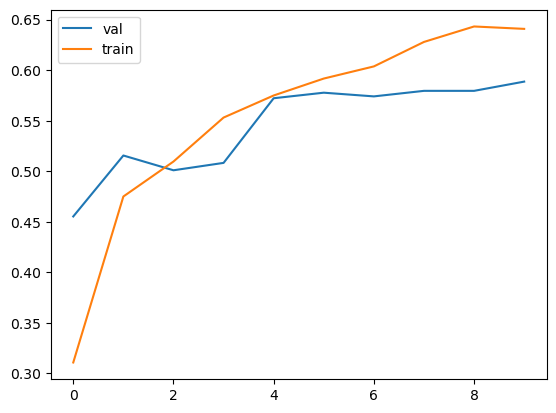

In [103]:
hist = history.history
plt.plot(hist['val_accuracy'], label = 'val')
plt.plot(hist['accuracy'], label = 'train')

plt.legend()

In [25]:
from tensorflow.keras.applications.efficientnet_v2 import EfficientNetV2B0
from tensorflow.keras.applications.efficientnet_v2 import preprocess_input

In [31]:
# Load image and apply preprocess_input function

# Load image and apply preprocess_input function
train_gen = ImageDataGenerator(
    preprocessing_function = preprocess_input,
    shear_range=10,
    zoom_range=0.1,
    vertical_flip=True)


train_ds = train_gen.flow_from_dataframe(train_data,
    './',
    x_col='filepath',
    y_col='name',
    target_size=(150, 150),
    batch_size=32)

# Loading Validation data same as above

# Load image and apply preprocess_input function
val_gen = ImageDataGenerator(preprocessing_function = preprocess_input)

val_ds = val_gen.flow_from_dataframe(val_data,
    './',
    x_col='filepath',
    y_col='name',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False) # WE don't need to shuffle since its just for validating

Found 5491 validated image filenames belonging to 9 classes.
Found 547 validated image filenames belonging to 9 classes.


In [37]:
def create_model(learning_rate = 0.01, 
                 size_inner=1000, 
                 size_inner_one=100, 
                 size_inner_two=100, 
                 droprate=0.5):
    
    base_model = EfficientNetV2B0(
    weights='imagenet',
    include_top = False,
    input_shape=(150, 150, 3)
    )

    base_model.trainable = False
    
    ###########################################################
    
    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    inner_one = keras.layers.Dense(size_inner_one, activation='relu')(inner)
    inner_two = keras.layers.Dense(size_inner_two, activation='relu')(inner_one)
    # drop rate comes after dense layers and rate represents how much network we freeze
    # drop = keras.layers.Dropout(droprate)(inner_two)
    
    outputs = keras.layers.Dense(9)(inner_two)
    model = keras.Model(inputs, outputs)
    
    ###########################################################
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True) # because multiclass classification
    
    model.compile(optimizer=optimizer, 
                  loss=loss, 
                  metrics=['accuracy'])
    
    return model

In [33]:
learning_rate = 0.001
size_inner = 1000
size_inner_one=1000
size_inner_two=100
droprate = 0.2

model = create_model(learning_rate = learning_rate, 
                         size_inner = size_inner, 
                         size_inner_one = size_inner_one,
                         size_inner_two = size_inner_two,
                        droprate = droprate)
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

2023-12-21 06:17:49.195924: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-21 06:17:49.202572: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-21 06:17:49.203122: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-21 06:17:49.203871: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

24274472/24274472 [==============================] - 0s 0us/step
Epoch 1/10


2023-12-21 06:17:59.103966: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2023-12-21 06:17:59.712941: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-21 06:17:59.713893: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-21 06:17:59.713942: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2023-12-21 06:17:59.714591: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-21 06:17:59.714693: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


172/172 [==============================] - 77s 406ms/step - loss: 1.1885 - accuracy: 0.5824 - val_loss: 0.9552 - val_accuracy: 0.6545
Epoch 2/10
172/172 [==============================] - 62s 360ms/step - loss: 0.8145 - accuracy: 0.7170 - val_loss: 0.8568 - val_accuracy: 0.6965
Epoch 3/10
172/172 [==============================] - 62s 361ms/step - loss: 0.6990 - accuracy: 0.7609 - val_loss: 0.8035 - val_accuracy: 0.7258
Epoch 4/10
172/172 [==============================] - 62s 360ms/step - loss: 0.5963 - accuracy: 0.7884 - val_loss: 0.9946 - val_accuracy: 0.6636
Epoch 5/10
172/172 [==============================] - 62s 360ms/step - loss: 0.5082 - accuracy: 0.8217 - val_loss: 0.7763 - val_accuracy: 0.7642
Epoch 6/10
172/172 [==============================] - 62s 359ms/step - loss: 0.4315 - accuracy: 0.8454 - val_loss: 0.9101 - val_accuracy: 0.7422
Epoch 7/10
172/172 [==============================] - 62s 359ms/step - loss: 0.3950 - accuracy: 0.8651 - val_loss: 0.8933 - val_accuracy: 0.7

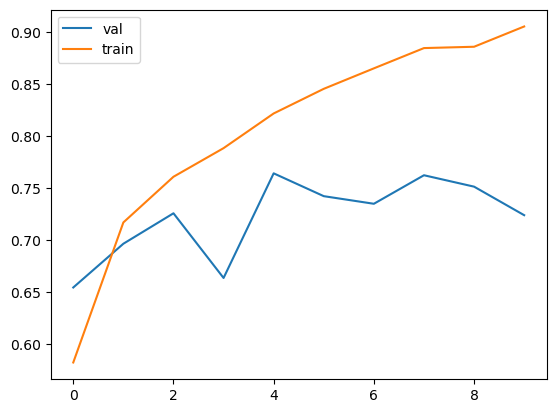

In [35]:
hist = history.history
plt.plot(hist['val_accuracy'], label = 'val')
plt.plot(hist['accuracy'], label = 'train')

plt.legend()

In [36]:
## Trying different learning rates

In [38]:
scores = {}

size_inner = 1000
size_inner_one=1000
size_inner_two=100
droprate = 0.2

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(f"Training model with learning_rate = {lr}")
    
    model = create_model(learning_rate=lr, 
                         size_inner=size_inner, 
                         size_inner_one=size_inner_one,
                         size_inner_two=size_inner_two,
                        droprate = droprate)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds) # epochs, go over dataset once means 1 epoch
    scores[lr] = history.history
    
    print(f"Finished Training model with learning_rate = {lr}")
    print()
    

Training model with learning_rate = 0.0001
Epoch 1/10
172/172 [==============================] - 68s 370ms/step - loss: 1.4362 - accuracy: 0.5090 - val_loss: 1.1005 - val_accuracy: 0.6051
Epoch 2/10
172/172 [==============================] - 65s 378ms/step - loss: 0.9219 - accuracy: 0.6787 - val_loss: 0.9014 - val_accuracy: 0.6801
Epoch 3/10
172/172 [==============================] - 66s 385ms/step - loss: 0.7727 - accuracy: 0.7370 - val_loss: 0.8157 - val_accuracy: 0.7130
Epoch 4/10
172/172 [==============================] - 67s 389ms/step - loss: 0.6929 - accuracy: 0.7651 - val_loss: 0.8008 - val_accuracy: 0.7148
Epoch 5/10
172/172 [==============================] - 67s 387ms/step - loss: 0.6214 - accuracy: 0.7895 - val_loss: 0.7809 - val_accuracy: 0.7294
Epoch 6/10
172/172 [==============================] - 67s 387ms/step - loss: 0.5757 - accuracy: 0.8020 - val_loss: 0.7312 - val_accuracy: 0.7386
Epoch 7/10
172/172 [==============================] - 67s 390ms/step - loss: 0.4989 - a

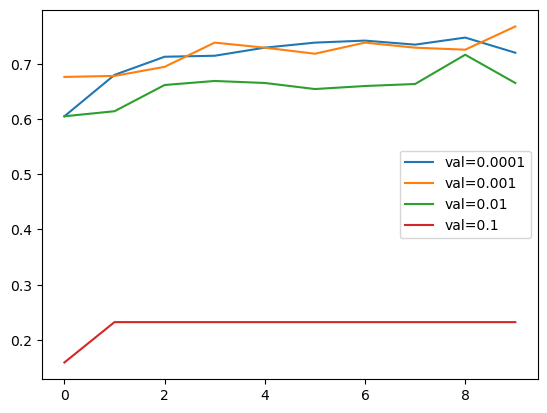

In [39]:
for learning_rate, hist in scores.items():
#     plt.plot(hist['accuracy'], label = ('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label = ('val=%s' % learning_rate))
    
# plt.ylim(0.55, 0.64)
plt.legend()

In [40]:
def create_model(learning_rate = 0.01, 
                 size_inner=1000, 
                 size_inner_one=100, 
                 size_inner_two=100, 
                 droprate=0.5):
    
    base_model = EfficientNetV2B0(
    weights='imagenet',
    include_top = False,
    input_shape=(150, 150, 3)
    )

    base_model.trainable = False
    
    ###########################################################
    
    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    inner_one = keras.layers.Dense(size_inner_one, activation='relu')(inner)
    inner_two = keras.layers.Dense(size_inner_two, activation='relu')(inner_one)
    # drop rate comes after dense layers and rate represents how much network we freeze
    drop = keras.layers.Dropout(droprate)(inner_two)
    
    outputs = keras.layers.Dense(9)(drop)
    model = keras.Model(inputs, outputs)
    
    ###########################################################
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True) # because multiclass classification
    
    model.compile(optimizer=optimizer, 
                  loss=loss, 
                  metrics=['accuracy'])
    
    return model

In [41]:
scores = {}

learning_rate=0.001
size_inner = 1000
size_inner_one=1000
size_inner_two=100
# droprate = 0.2

for droprate in [0.0, 0.2, 0.5, 0.8]:
    print(f"Training model with droprate = {droprate}")
    
    model = create_model(learning_rate = learning_rate, 
                         size_inner = size_inner, 
                         size_inner_one = size_inner_one,
                         size_inner_two = size_inner_two,
                        droprate = droprate)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds) # epochs, go over dataset once means 1 epoch
    scores[droprate] = history.history
    
    print(f"Finished Training model with droprate = {droprate}")
    print()
    

Training model with droprate = 0.0
Epoch 1/10
172/172 [==============================] - 68s 371ms/step - loss: 1.1898 - accuracy: 0.5904 - val_loss: 0.9995 - val_accuracy: 0.6325
Epoch 2/10
172/172 [==============================] - 62s 359ms/step - loss: 0.8208 - accuracy: 0.7212 - val_loss: 0.9633 - val_accuracy: 0.6709
Epoch 3/10
172/172 [==============================] - 62s 361ms/step - loss: 0.6932 - accuracy: 0.7627 - val_loss: 0.8581 - val_accuracy: 0.7239
Epoch 4/10
172/172 [==============================] - 62s 360ms/step - loss: 0.6004 - accuracy: 0.7915 - val_loss: 0.8480 - val_accuracy: 0.7203
Epoch 5/10
172/172 [==============================] - 62s 361ms/step - loss: 0.5091 - accuracy: 0.8312 - val_loss: 0.8770 - val_accuracy: 0.7313
Epoch 6/10
172/172 [==============================] - 62s 361ms/step - loss: 0.4610 - accuracy: 0.8421 - val_loss: 0.8664 - val_accuracy: 0.7495
Epoch 7/10
172/172 [==============================] - 62s 361ms/step - loss: 0.4102 - accuracy:

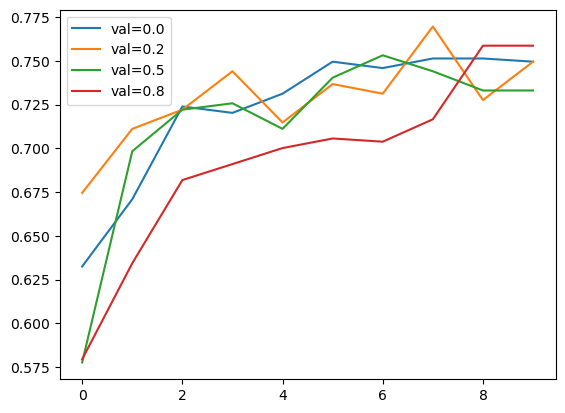

In [47]:
for drp, hist in scores.items():
#     plt.plot(hist['accuracy'], label = ('train=%s' % drp))
    plt.plot(hist['val_accuracy'], label = ('val=%s' % drp))
    
# plt.ylim(0.55, 0.64)
plt.legend()

In [48]:
del scores[0.5]

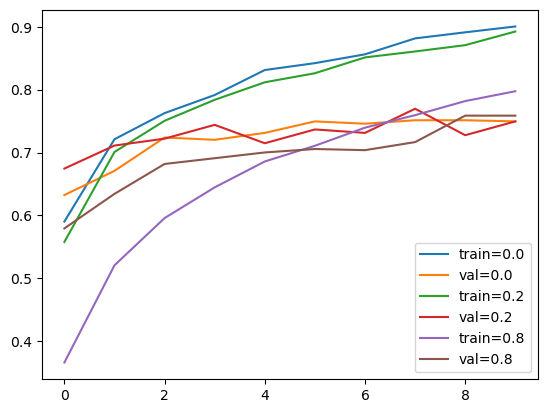

In [50]:
for drp, hist in scores.items():
    plt.plot(hist['accuracy'], label = ('train=%s' % drp))
    plt.plot(hist['val_accuracy'], label = ('val=%s' % drp))
    
# plt.ylim(0.55, 0.64)
plt.legend()

## 8.11 Training a larger model

<ul><li>Train a 299x299 model</li></ul>

we used smaller model before so it wil train 4 times fast and let us iterate over and tune it

In [68]:
input_size=299

In [ ]:
# Load image and apply preprocess_input function

# Load image and apply preprocess_input function
train_gen = ImageDataGenerator(
    preprocessing_function = preprocess_input,
    shear_range=10,
    zoom_range=0.1,
    vertical_flip=True)


train_ds = train_gen.flow_from_dataframe(train_data,
    './',
    x_col='filepath',
    y_col='name',
    target_size=(150, 150),
    batch_size=32)

# Loading Validation data same as above

# Load image and apply preprocess_input function
val_gen = ImageDataGenerator(preprocessing_function = preprocess_input)

val_ds = val_gen.flow_from_dataframe(val_data,
    './',
    x_col='filepath',
    y_col='name',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False) # WE don't need to shuffle since its just for validating

In [53]:
def create_model(input_size = 150,
                 learning_rate = 0.01, 
                 size_inner=1000, 
                 size_inner_one=100, 
                 size_inner_two=100, 
                 droprate=0.5):
    
    base_model = EfficientNetV2B0(
    weights='imagenet',
    include_top = False,
    input_shape=(input_size, input_size, 3)
    )

    base_model.trainable = False
    
    ###########################################################
    
    inputs = keras.Input(shape=(input_size, input_size, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    inner_one = keras.layers.Dense(size_inner_one, activation='relu')(inner)
    inner_two = keras.layers.Dense(size_inner_two, activation='relu')(inner_one)
    # drop rate comes after dense layers and rate represents how much network we freeze
    drop = keras.layers.Dropout(droprate)(inner_two)
    
    outputs = keras.layers.Dense(9)(drop)
    model = keras.Model(inputs, outputs)
    
    ###########################################################
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True) # because multiclass classification
    
    model.compile(optimizer=optimizer, 
                  loss=loss, 
                  metrics=['accuracy'])
    
    return model

In [54]:
scores = {}

learning_rate=0.001
size_inner = 1000
size_inner_one=1000
size_inner_two=100
droprate = 0.2

input_size=299

model = create_model(input_size = 299,
                     learning_rate = learning_rate, 
                         size_inner = size_inner, 
                         size_inner_one = size_inner_one,
                         size_inner_two = size_inner_two,
                        droprate = droprate)
history = model.fit(train_ds, epochs=50, validation_data=val_ds) # epochs, go over dataset once means 1 epoc

Epoch 1/50
172/172 [==============================] - 73s 398ms/step - loss: 1.2938 - accuracy: 0.5502 - val_loss: 1.1731 - val_accuracy: 0.5978
Epoch 2/50
172/172 [==============================] - 67s 388ms/step - loss: 0.9062 - accuracy: 0.6940 - val_loss: 0.8668 - val_accuracy: 0.7038
Epoch 3/50
172/172 [==============================] - 67s 389ms/step - loss: 0.7646 - accuracy: 0.7407 - val_loss: 0.8556 - val_accuracy: 0.7130
Epoch 4/50
172/172 [==============================] - 67s 388ms/step - loss: 0.6546 - accuracy: 0.7796 - val_loss: 1.0383 - val_accuracy: 0.7038
Epoch 5/50
172/172 [==============================] - 67s 388ms/step - loss: 0.5794 - accuracy: 0.8026 - val_loss: 0.8530 - val_accuracy: 0.7239
Epoch 6/50
172/172 [==============================] - 67s 387ms/step - loss: 0.5213 - accuracy: 0.8270 - val_loss: 0.9157 - val_accuracy: 0.7367
Epoch 7/50
172/172 [==============================] - 67s 387ms/step - loss: 0.4458 - accuracy: 0.8519 - val_loss: 0.9520 - val_ac

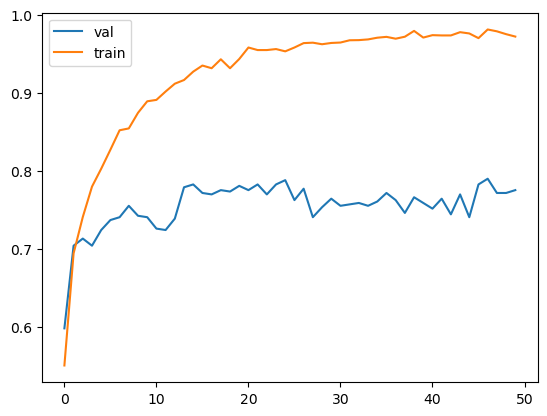

In [59]:
hist = history.history
plt.plot(hist['val_accuracy'], label = 'val')
plt.plot(hist['accuracy'], label = 'train')

plt.legend()

In [57]:
## checkpointing
## and making model easier

checkpoint = keras.callbacks.ModelCheckpoint(
    'EfficientNetV2B0_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

learning_rate=0.001
size_inner = 1000
size_inner_one=100
size_inner_two=100
droprate = 0.2

input_size=299

model = create_model(input_size = input_size,
                     learning_rate = learning_rate, 
                         size_inner = size_inner, 
                         size_inner_one = size_inner_one,
                         size_inner_two = size_inner_two,
                        droprate = droprate)

history = model.fit(train_ds, 
                    epochs=30, 
                    validation_data=val_ds,
                   callbacks=[checkpoint]) # epochs, go over dataset once means 1 epoc

Epoch 1/30
172/172 [==============================] - 74s 403ms/step - loss: 1.2953 - accuracy: 0.5367 - val_loss: 1.0117 - val_accuracy: 0.6344
Epoch 2/30
172/172 [==============================] - 67s 390ms/step - loss: 0.9158 - accuracy: 0.6944 - val_loss: 0.8808 - val_accuracy: 0.6837
Epoch 3/30
172/172 [==============================] - 67s 391ms/step - loss: 0.7641 - accuracy: 0.7427 - val_loss: 0.7874 - val_accuracy: 0.7203
Epoch 4/30
172/172 [==============================] - 67s 391ms/step - loss: 0.6776 - accuracy: 0.7667 - val_loss: 0.8009 - val_accuracy: 0.7258
Epoch 5/30
172/172 [==============================] - 67s 389ms/step - loss: 0.5909 - accuracy: 0.7984 - val_loss: 0.8110 - val_accuracy: 0.7239
Epoch 6/30
172/172 [==============================] - 67s 389ms/step - loss: 0.5373 - accuracy: 0.8170 - val_loss: 0.8166 - val_accuracy: 0.7367
Epoch 7/30
172/172 [==============================] - 67s 390ms/step - loss: 0.4859 - accuracy: 0.8341 - val_loss: 0.8876 - val_ac

KeyboardInterrupt: 

In [61]:
## checkpointing
## and making model easier
## making difficult but adding 0.8 drop rate

checkpoint = keras.callbacks.ModelCheckpoint(
    'EfficientNetV2B0_v2_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

learning_rate=0.001
size_inner = 1000
size_inner_one=1000
size_inner_two=100
droprate = 0.8

input_size=299

model = create_model(input_size = input_size,
                     learning_rate = learning_rate, 
                         size_inner = size_inner, 
                         size_inner_one = size_inner_one,
                         size_inner_two = size_inner_two,
                        droprate = droprate)

history = model.fit(train_ds, 
                    epochs=30, 
                    validation_data=val_ds,
                   callbacks=[checkpoint]) # epochs, go over dataset once means 1 epoc

Epoch 1/30
172/172 [==============================] - 75s 405ms/step - loss: 1.9004 - accuracy: 0.3202 - val_loss: 1.3819 - val_accuracy: 0.5521
Epoch 2/30
172/172 [==============================] - 67s 389ms/step - loss: 1.4844 - accuracy: 0.4985 - val_loss: 1.3053 - val_accuracy: 0.5576
Epoch 3/30
172/172 [==============================] - 67s 389ms/step - loss: 1.2505 - accuracy: 0.5910 - val_loss: 1.0726 - val_accuracy: 0.6618
Epoch 4/30
172/172 [==============================] - 67s 391ms/step - loss: 1.1285 - accuracy: 0.6370 - val_loss: 0.9962 - val_accuracy: 0.6728
Epoch 5/30
172/172 [==============================] - 67s 387ms/step - loss: 1.0180 - accuracy: 0.6706 - val_loss: 1.0741 - val_accuracy: 0.6709
Epoch 6/30
172/172 [==============================] - 67s 391ms/step - loss: 0.9139 - accuracy: 0.7090 - val_loss: 0.9526 - val_accuracy: 0.6929
Epoch 7/30
172/172 [==============================] - 67s 390ms/step - loss: 0.8761 - accuracy: 0.7316 - val_loss: 0.9966 - val_ac

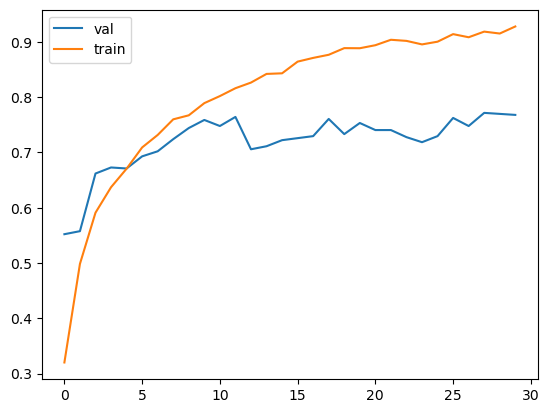

In [62]:
hist = history.history
plt.plot(hist['val_accuracy'], label = 'val')
plt.plot(hist['accuracy'], label = 'train')

plt.legend()

## Training Correctly

In [47]:
input_size=299

In [48]:
# Load image and apply preprocess_input function

# Load image and apply preprocess_input function
train_gen = ImageDataGenerator(
    preprocessing_function = preprocess_input,
    shear_range=10,
    zoom_range=0.1,
    vertical_flip=True)


train_ds = train_gen.flow_from_dataframe(train_data,
    './',
    x_col='filepath',
    y_col='name',
    target_size=(input_size, input_size),
    batch_size=32)

# Loading Validation data same as above

# Load image and apply preprocess_input function
val_gen = ImageDataGenerator(preprocessing_function = preprocess_input)

val_ds = val_gen.flow_from_dataframe(val_data,
    './',
    x_col='filepath',
    y_col='name',
    target_size=(input_size, input_size),
    batch_size=32,
    shuffle=False) # WE don't need to shuffle since its just for validating

Found 5491 validated image filenames belonging to 9 classes.
Found 547 validated image filenames belonging to 9 classes.


In [108]:
from tensorflow.keras.applications.efficientnet_v2 import EfficientNetV2B0
from tensorflow.keras.applications.efficientnet_v2 import preprocess_input

In [50]:
def create_model(input_size = 150,
                 learning_rate = 0.01, 
                 size_inner=1000, 
                 size_inner_one=100, 
                 size_inner_two=100, 
                 droprate=0.5):
    
    base_model = EfficientNetV2B0(
    weights='imagenet',
    include_top = False,
    input_shape=(input_size, input_size, 3)
    )

    base_model.trainable = False
    
    ###########################################################
    
    inputs = keras.Input(shape=(input_size, input_size, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    inner_one = keras.layers.Dense(size_inner_one, activation='relu')(inner)
    inner_two = keras.layers.Dense(size_inner_two, activation='relu')(inner_one)
    # drop rate comes after dense layers and rate represents how much network we freeze
    drop = keras.layers.Dropout(droprate)(inner_two)
    
    outputs = keras.layers.Dense(9)(drop)
    model = keras.Model(inputs, outputs)
    
    ###########################################################
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True) # because multiclass classification
    
    model.compile(optimizer=optimizer, 
                  loss=loss, 
                  metrics=['accuracy'])
    
    return model

In [51]:
## checkpointing
## and making model easier
## making difficult but adding 0.8 drop rate

checkpoint = keras.callbacks.ModelCheckpoint(
    'EfficientNetV2B0_v3_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

learning_rate=0.001
size_inner = 1000
size_inner_one=1000
size_inner_two=100
droprate = 0.2

input_size=299

model = create_model(input_size = input_size,
                     learning_rate = learning_rate, 
                         size_inner = size_inner, 
                         size_inner_one = size_inner_one,
                         size_inner_two = size_inner_two,
                        droprate = droprate)

history = model.fit(train_ds, 
                    epochs=30, 
                    validation_data=val_ds,
                   callbacks=[checkpoint]) # epochs, go over dataset once means 1 epoc

Epoch 1/30
172/172 [==============================] - 150s 845ms/step - loss: 1.0622 - accuracy: 0.6316 - val_loss: 0.8100 - val_accuracy: 0.7166
Epoch 2/30
172/172 [==============================] - 133s 773ms/step - loss: 0.6762 - accuracy: 0.7704 - val_loss: 0.6637 - val_accuracy: 0.7697
Epoch 3/30
172/172 [==============================] - 132s 767ms/step - loss: 0.5307 - accuracy: 0.8188 - val_loss: 0.5541 - val_accuracy: 0.8154
Epoch 4/30
172/172 [==============================] - 132s 765ms/step - loss: 0.4298 - accuracy: 0.8541 - val_loss: 0.5618 - val_accuracy: 0.8227
Epoch 5/30
172/172 [==============================] - 131s 762ms/step - loss: 0.3622 - accuracy: 0.8771 - val_loss: 0.6368 - val_accuracy: 0.8062
Epoch 6/30
172/172 [==============================] - 130s 755ms/step - loss: 0.3173 - accuracy: 0.8924 - val_loss: 0.5730 - val_accuracy: 0.8227
Epoch 7/30
172/172 [==============================] - 131s 761ms/step - loss: 0.2831 - accuracy: 0.9006 - val_loss: 0.6146 -

## Using the model

In [6]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

2023-12-25 00:09:04.430133: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [7]:
model = keras.models.load_model('EfficientNetV2B0_v3_26_0.885.h5')

2023-12-25 00:09:11.018510: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-25 00:09:11.026957: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-25 00:09:11.027603: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-25 00:09:11.028580: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

In [3]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.efficientnet_v2 import preprocess_input

In [4]:
# Reading test dataset
input_size=299

test_gen = ImageDataGenerator(preprocessing_function = preprocess_input)

test_ds = test_gen.flow_from_dataframe(test_data,
    './',
    x_col='filepath',
    y_col='name',
    target_size=(input_size, input_size),
    batch_size=32,
    shuffle=False) # WE don't need to shuffle since its just for validating

NameError: name 'test_data' is not defined

In [5]:
test_ds.class_indices

NameError: name 'test_ds' is not defined

In [57]:
model.evaluate(test_ds)

22/22 [==============================] - 8s 281ms/step - loss: 0.1888 - accuracy: 0.9556


[0.1887790411710739, 0.9556213021278381]

In [58]:
import random

In [59]:
photo_num = random.randint(0, 675)
photo_num

119

In [60]:
path = test_data.iloc[photo_num]['filepath']

In [40]:
path = 'mushroom-data-small/Lactarius/401_79lQJ0MGorw.jpg'

In [41]:
img = load_img(path, target_size=(299, 299))

In [67]:
# one image loaded
x = np.array(img)
#capital case (batch of images)
X = np.array([x], dtype=np.float32)
X.shape

(1, 299, 299, 3)

In [68]:
X = preprocess_input(X)

In [69]:
pred = model.predict(X)

1/1 [==============================] - 1s 1s/step


In [70]:
pred[0]

array([ -5.48693  ,  -9.525788 ,  -8.17962  ,   2.876858 ,  -5.4976883,
       -10.044158 ,  14.574054 ,   2.4690795,  -4.3629174], dtype=float32)

In [71]:
# classes = ['Boletus', 'Amanita', 'Suillus', 'Agaricus', 'Entoloma',
#        'Hygrocybe', 'Lactarius', 'Russula', 'Cortinarius']
classes = ['Agaricus',
 'Amanita',
 'Boletus',
 'Cortinarius',
 'Entoloma',
 'Hygrocybe',
 'Lactarius',
 'Russula',
 'Suillus']

In [72]:
# logits - relative likelihood of belonging to the class
dict(zip(classes, pred[0]))

{'Agaricus': -5.48693,
 'Amanita': -9.525788,
 'Boletus': -8.17962,
 'Cortinarius': 2.876858,
 'Entoloma': -5.4976883,
 'Hygrocybe': -10.044158,
 'Lactarius': 14.574054,
 'Russula': 2.4690795,
 'Suillus': -4.3629174}

## Convert Keras to TF-Lite

In [50]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('mushroom-model.tflite', 'wb') as f_out:
    f_out.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpv2bb73pm/assets


INFO:tensorflow:Assets written to: /tmp/tmpv2bb73pm/assets
2023-12-24 12:02:23.504400: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2023-12-24 12:02:23.504449: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2023-12-24 12:02:23.504625: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: /tmp/tmpv2bb73pm
2023-12-24 12:02:23.584552: I tensorflow/cc/saved_model/reader.cc:81] Reading meta graph with tags { serve }
2023-12-24 12:02:23.584596: I tensorflow/cc/saved_model/reader.cc:122] Reading SavedModel debug info (if present) from: /tmp/tmpv2bb73pm
2023-12-24 12:02:23.875993: I tensorflow/cc/saved_model/loader.cc:228] Restoring SavedModel bundle.
2023-12-24 12:02:24.780894: I tensorflow/cc/saved_model/loader.cc:212] Running initialization op on SavedModel bundle at path: /tmp/tmpv2bb73pm
2023-12-24 12:02:25.223855: I tensorflow/cc/saved_model/loader.cc:301] SavedModel

In [8]:
import tensorflow.lite as tflite

2023-12-25 06:06:39.486548: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [9]:
interpreter = tflite.Interpreter(model_path = "mushroom-model.tflite")
# loading weights into memory as well for tflite
interpreter.allocate_tensors()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [10]:
interpreter.get_output_details()

[{'name': 'StatefulPartitionedCall:0',
  'index': 538,
  'shape': array([1, 9], dtype=int32),
  'shape_signature': array([-1,  9], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [11]:
# finding index for input to model
input_index = interpreter.get_input_details()[0]['index']
input_index

0

In [12]:
# finding index for output to model
output_index = interpreter.get_output_details()[0]['index']
output_index

538

In [17]:
interpreter.set_tensor(input_index, X)

In [75]:
# Now we initialized the input of the interpreter with X 
# Now we need to invoke all the CONVOLUTIONS IN THE NEURAL Network
interpreter.invoke()

In [81]:
# fetching all results from
preds = interpreter.get_tensor(output_index)

In [82]:
classes = ['Agaricus',
 'Amanita',
 'Boletus',
 'Cortinarius',
 'Entoloma',
 'Hygrocybe',
 'Lactarius',
 'Russula',
 'Suillus']

In [83]:
dict(zip(classes, preds[0]))

{'Agaricus': -5.4869337,
 'Amanita': -9.525794,
 'Boletus': -8.17962,
 'Cortinarius': 2.8768616,
 'Entoloma': -5.4976907,
 'Hygrocybe': -10.044166,
 'Lactarius': 14.574065,
 'Russula': 2.4690726,
 'Suillus': -4.362919}

## Removing Tensorflow dependency

In [23]:
!pip install tflite-runtime

In [1]:
# import tensorflow.lite as tflite
import tflite_runtime.interpreter as tflite

In [3]:
interpreter = tflite.Interpreter(model_path = "mushroom-model.tflite")
# loading weights into memory as well for tflite
interpreter.allocate_tensors()
# finding index for input to model
input_index = interpreter.get_input_details()[0]['index']
# finding index for output to model
output_index = interpreter.get_output_details()[0]['index']

In [4]:
from PIL import Image
import numpy as np

In [5]:
path = 'mushroom-data-small/Lactarius/401_79lQJ0MGorw.jpg'

In [6]:
def load_image(path):
    with Image.open(path) as img:
        img = img.resize((299,299), Image.Resampling.NEAREST)
        return img

In [7]:
def image_to_array(img):
    # one image loaded
    x = np.array(img)
    #capital case (batch of images)
    X = np.array([x], dtype=np.float32)
    return X

In [8]:
def resize_image(img, target_size=(299,299)):
    return img.resize(target_size, Image.Resampling.NEAREST)

In [9]:
img = load_image(path)

In [10]:
X = image_to_array(img)

In [11]:
# with Image.open(path) as img:
#     img = img.resize((299,299), Image.Resampling.NEAREST)

In [12]:
# # one image loaded
# x = np.array(img)
# #capital case (batch of images)
# X = np.array([x], dtype=np.float32)
# X.shape

In [13]:
interpreter.set_tensor(input_index, X)

# Now we initialized the input of the interpreter with X 
# Now we need to invoke all the CONVOLUTIONS IN THE NEURAL Network
interpreter.invoke()
# fetching all results from
preds = interpreter.get_tensor(output_index)

In [14]:
classes = ['Agaricus',
 'Amanita',
 'Boletus',
 'Cortinarius',
 'Entoloma',
 'Hygrocybe',
 'Lactarius',
 'Russula',
 'Suillus']
dict(zip(classes, preds[0]))

{'Agaricus': -5.486934,
 'Amanita': -9.525795,
 'Boletus': -8.179619,
 'Cortinarius': 2.8768625,
 'Entoloma': -5.4976907,
 'Hygrocybe': -10.044167,
 'Lactarius': 14.574065,
 'Russula': 2.4690716,
 'Suillus': -4.36292}